In [1]:
%matplotlib inline 

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [3]:
#importing necessary file
file_one = "Resources/BTCUSD1.csv"
BTC_df = pd.read_csv(file_one, encoding="ISO-8859-1")
BTC_df.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,12/1/2014,BTCUSD,300.0,370.0,300.00,370.0,0.05656,19.53
1,12/2/2014,BTCUSD,370.0,378.0,370.00,378.0,15.01000,5675.07
2,12/3/2014,BTCUSD,378.0,378.0,377.01,378.0,0.54660,206.52
3,12/4/2014,BTCUSD,378.0,378.0,377.10,377.1,0.01000,3.77
4,12/5/2014,BTCUSD,377.1,377.1,377.10,377.1,0.00000,0.00


In [4]:
#summary statistics
BTC_df.describe()

,Open,High,Low,Close,Volume BTC,Volume USD
count,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1.556000e+03
mean,3057.208284,3155.714171,2939.010167,3059.239859,10068.768794,4.524816e+07
std,3680.456743,3828.731372,3487.553546,3679.697171,9470.076910,9.653595e+07
min,120.000000,184.000000,0.060000,120.000000,0.000000,0.000000e+00
25%,386.925000,397.472500,377.100000,388.027500,4966.670000,2.286841e+06
50%,922.495000,930.665000,897.505000,923.425000,7394.535000,6.761759e+06
75%,5752.732500,5897.000000,5539.045000,5752.732500,12218.835000,4.474855e+07
max,19650.000000,19891.990000,19010.000000,19650.000000,160540.990000,1.237771e+09


In [5]:
#creating a range column to demonstrate 
BTC_range = BTC_df['High'] - BTC_df['Low']
BTC_range
BTC_df['range'] = BTC_range

In [6]:
#determining the skew in order to see how influenced Bitcoin's close is by outlier closes.
mean_range = st.mean(BTC_df['Close'])
median_range = st.median(BTC_df['Close'])
Skew = median_range - mean_range
Skew

-2135.814858611825

In [15]:
#Creating the close_delta column inorder to gauge the amount of movement from the previous day
btc_close = BTC_df['Close']
BTC_delta = [btc_close[i+1] - btc_close[i] for i in range(len(btc_close)-1)]
BTC_delta.append('0')
BTC_df['Close_Delta'] = BTC_delta
BTC_df.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,range,Close_Delta
0,12/1/2014,BTCUSD,300.0,370.0,300.00,370.0,0.05656,19.53,70.00,8
1,12/2/2014,BTCUSD,370.0,378.0,370.00,378.0,15.01000,5675.07,8.00,0
2,12/3/2014,BTCUSD,378.0,378.0,377.01,378.0,0.54660,206.52,0.99,-0.9
3,12/4/2014,BTCUSD,378.0,378.0,377.10,377.1,0.01000,3.77,0.90,0
4,12/5/2014,BTCUSD,377.1,377.1,377.10,377.1,0.00000,0.00,0.00,0.9


In [16]:
#correlational breakdown
BTC_corr = BTC_df.corr()
BTC_corr

,Open,High,Low,Close,Volume BTC,Volume USD,range
Open,1.000000,0.998322,0.997119,0.997467,0.425009,0.759956,0.750274
High,0.998322,1.000000,0.996450,0.999015,0.441162,0.777426,0.769331
Low,0.997119,0.996450,1.000000,0.998164,0.395331,0.726848,0.712820
Close,0.997467,0.999015,0.998164,1.000000,0.423573,0.759834,0.748126
Volume BTC,0.425009,0.441162,0.395331,0.423573,1.000000,0.720163,0.675317
Volume USD,0.759956,0.777426,0.726848,0.759834,0.720163,1.000000,0.960981
range,0.750274,0.769331,0.712820,0.748126,0.675317,0.960981,1.000000


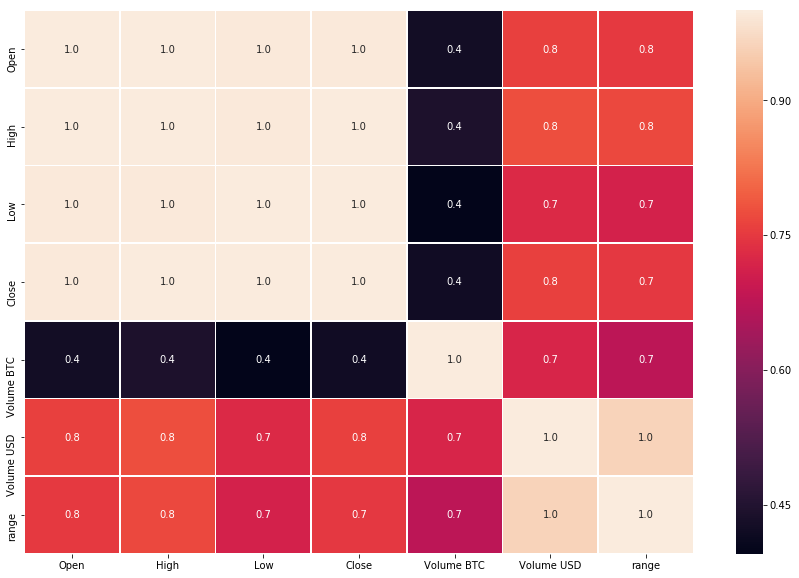

In [26]:
#correlational heatmap
s,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(BTC_df.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

In [49]:
s = BTC_corr.unstack()
corr_sort = s.sort_values(kind="quicksort")
print(corr_sort)

Volume BTC  Low           0.395331
Low         Volume BTC    0.395331
Volume BTC  Close         0.423573
Close       Volume BTC    0.423573
Open        Volume BTC    0.425009
Volume BTC  Open          0.425009
            High          0.441162
High        Volume BTC    0.441162
range       Volume BTC    0.675317
Volume BTC  range         0.675317
Low         range         0.712820
range       Low           0.712820
Volume USD  Volume BTC    0.720163
Volume BTC  Volume USD    0.720163
Low         Volume USD    0.726848
Volume USD  Low           0.726848
Close       range         0.748126
range       Close         0.748126
Open        range         0.750274
range       Open          0.750274
Close       Volume USD    0.759834
Volume USD  Close         0.759834
            Open          0.759956
Open        Volume USD    0.759956
High        range         0.769331
range       High          0.769331
High        Volume USD    0.777426
Volume USD  High          0.777426
            range   

In [88]:
#Utilizing the open, high, low, range, close delta, and volume as the independent variables.
#The dependent variable we wish to predict is the close.
X = BTC_df[['Open','High','Low','range','Close_Delta','Volume BTC']]
y = BTC_df['Close']
print(X.shape, y.shape)
#importing from sklearn linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

(1556, 6) (1556,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
file_two = "Resources/btc_timeslice.csv"
BTC_df2 = pd.read_csv(file_two, encoding="ISO-8859-1")
BTC_df2.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,11/19/2018,BTCUSD,5560.00,5560.00,4670.63,4733.50,36133.96,1.831241e+08
1,11/20/2018,BTCUSD,4733.50,4889.00,4035.00,4349.23,61797.01,2.758757e+08
2,11/21/2018,BTCUSD,4349.23,4627.55,4239.01,4545.11,27423.73,1.218005e+08
3,11/22/2018,BTCUSD,4545.11,4589.00,4238.69,4263.66,12107.20,5.383973e+07
4,11/23/2018,BTCUSD,4263.66,4366.05,4086.16,4283.80,18389.56,7.768528e+07


In [75]:
BTC_df2.describe()

,Open,High,Low,Close,Volume BTC,Volume USD
count,107.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02
mean,3737.329813,3833.896075,3623.117757,3720.000935,12250.829439,4.683025e+07
std,330.765541,349.522701,252.064702,278.795295,8954.784258,3.833851e+07
min,3183.000000,3228.690000,3130.000000,3183.000000,326.230000,1.208481e+06
25%,3544.600000,3609.430000,3464.895000,3544.600000,7016.295000,2.462321e+07
50%,3682.650000,3818.080000,3579.380000,3682.650000,9408.710000,3.545135e+07
75%,3888.035000,4020.050000,3763.310000,3877.505000,13970.380000,5.391114e+07
max,5560.000000,5560.000000,4670.630000,4733.500000,61797.010000,2.758757e+08


In [63]:
#isolating the median and mean for the close inorder to determine skew
btc_median = st.median(BTC_df2["Close"])
btc_mean = st.mean(BTC_df2['Close'])
Skew = btc_median - btc_mean
Skew

-37.35093457943913

In [89]:
model.fit(X, y)
print(model)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Weight coefficients:  [ 9.98023596e-01  1.14711855e-03  7.42108841e-04  4.05009710e-04
 -9.98445959e-01 -3.64578935e-06]
y-axis intercept:  0.08496680469806961


In [90]:
#Determining prediction capability
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 3700.01
Predicted output: 3699.7822856384932
Prediction Error: -0.227714361506969


In [94]:
#creating dataframe to view the predicted agains the actual
BTC_df1 = pd.DataFrame({"Date": BTC_df['Date'],"Predicted": predictions, "Actual": y})[["Date","Predicted","Actual"]]
BTC_df1

,Date,Predicted,Actual
0,3/5/2019,3699.782286,3700.01
1,3/4/2019,3700.569817,3700.72
2,3/3/2019,3786.697676,3786.93
3,3/2/2019,3809.438543,3809.70
4,3/1/2019,3805.957635,3806.17
5,2/28/2019,3792.014082,3792.14
6,2/27/2019,3799.634046,3799.92
7,2/26/2019,3799.232260,3799.48
8,2/25/2019,3818.573493,3818.79
9,2/24/2019,3734.467486,3734.22
